# 년도별 분석에서 얻는 인사이트

2022년은 코로나에서 일상 생활이 돌아온 시기로, 일시적인 고점이 형성됨.  

저런 특수한 경우가 아니라면 방문객수, 비용대비 방문자는 언제나 비슷하게 형성.  
시간이 지나며 방문자수가 증가하거나 줄어들 것이다 >> X 

In [25]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('../data/전국연도별방문자회계정보정말정말최종ver.csv')
df.columns

Index(['축제명', '개최년도', '축제기간(일)', '(현지인)방문자수', '(외지인)방문자수', '(외국인)방문자수',
       '(전체)방문자수', '일평균 방문자수', '전년도 일평균 방문자수', '일평균 방문자수 증감률', '(이전)전체방문자',
       '(전체)방문자증감', '(현지인)방문자비율', '(외지인)방문자비율', '(외국인)방문자비율', '전년대비방문자증감비율',
       'index_x', '도', '시군구', 'normalized_index_x', 'df1_index', 'df2_index',
       '회계연도', '지역명', '행사축제명', '총비용', '사업수익', '순원가', '시작월', '종료월', 'index_y',
       'normalized_index_y'],
      dtype='object')

In [27]:
df_year = (
    df.loc[df['개최년도'].between(2018, 2023), ['개최년도', '(전체)방문자수', '총비용']]
    .groupby('개최년도').sum())
df_year

,(전체)방문자수,총비용
개최년도,,
2018,13671214,8.508074e+10
2019,13945717,8.160728e+10
2022,16701817,6.981146e+10
2023,17024718,9.283927e+10


In [28]:
from sklearn.preprocessing import MinMaxScaler

ax = df[['개최년도', '시작월', '축제명', '(전체)방문자수', '총비용']].copy()
ax.columns = ['year', 'month', 'name', 'visitors', 'cost']
ax['visit/cost'] = np.where(ax['cost'] == 0, np.nan, ax['visitors'] / ax['cost'])       #비용 대비 방문객 항 추가.
ax = ax.dropna(subset = ['month'])


ax['visit/cost'] = np.log(ax['visit/cost'])                                             #값이 너무 튀어서 로그처리.

mms = MinMaxScaler()
ax['visit/cost_normalized'] = mms.fit_transform(ax[['visit/cost']])              


ax['month'] = ax['month'].astype(int)                                               #자꾸 마지막에 . 들어가서 int로 변경
ax['year_month'] = pd.to_datetime(ax['year'].astype(str) + '-' + ax['month'].astype(str).str.zfill(2))

ax['year_month'] = pd.Categorical(
    ax['year_month'].dt.strftime('%Y.%m'),  
    categories=ax['year_month'].dt.strftime('%Y.%m').sort_values().unique(),
    ordered=True)


ax_num = ax[['year_month', 'visitors', 'visit/cost_normalized']]                #년간 비교를 위해서 groupby 하려 했는데 object라 안나와서 좀 조정.
ax_num_y = ax[['year', 'visitors', 'visit/cost_normalized']]

ax_mean = ax_num.groupby('year_month').mean().reset_index()
ax_mean_y = ax_num_y.groupby('year').mean().reset_index()

C:\Users\zhdwj\AppData\Local\Temp\ipykernel_18164\1778465045.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax_mean = ax_num.groupby('year_month').mean().reset_index()


# 그래프들의 dot는 해당 년, 월에 분포된 축제들  
# 그래프의 실선은 해당 년, 월에 개최된 축제들의 평균 방문자수.

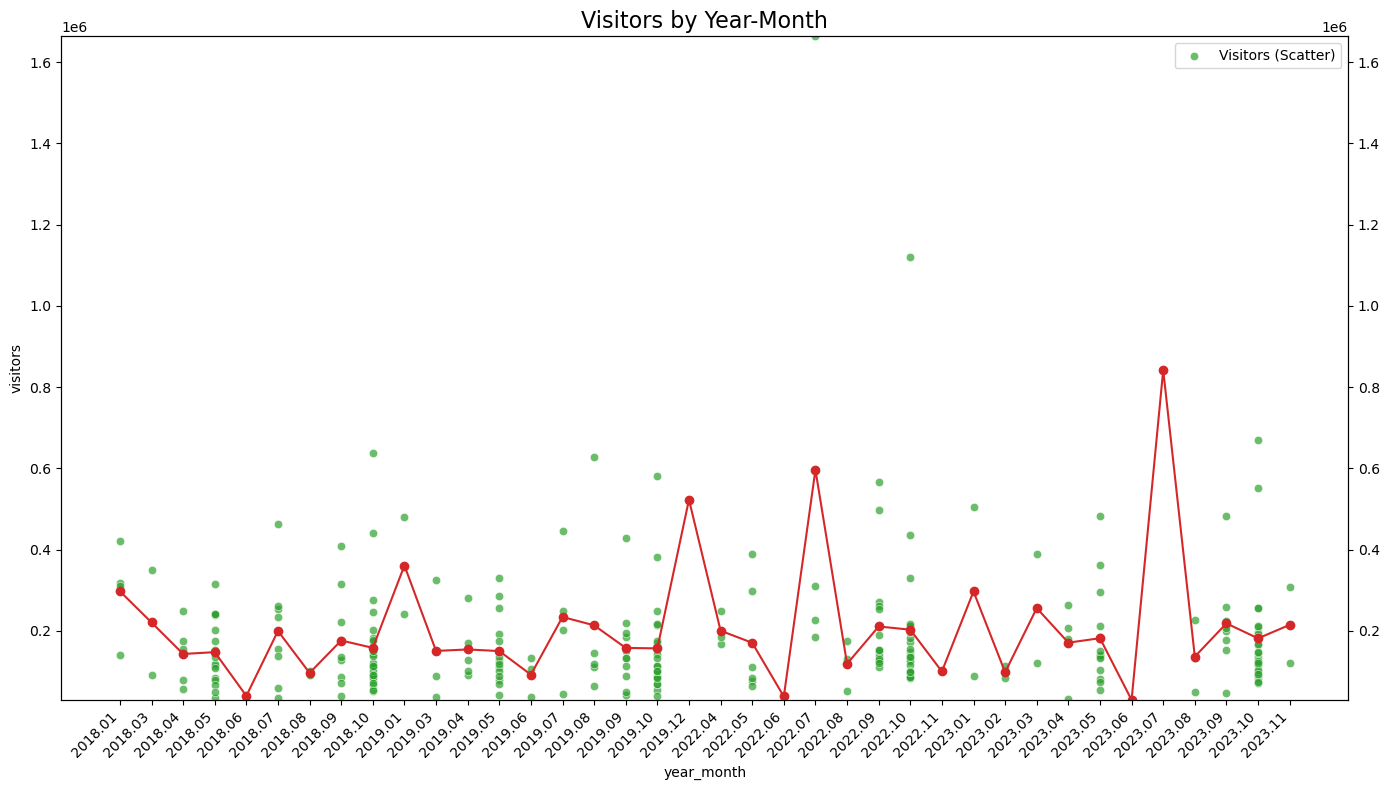

In [29]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 y축: Scatter Plot
sns.scatterplot(
    data=ax,
    x='year_month',
    y='visitors',
    color='tab:green', 
    alpha=0.7,
    label='Visitors (Scatter)',
    ax=ax1)

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 두 번째 y축: Line Plot
ax2.plot(
    ax_mean['year_month'],
    ax_mean['visitors'],
    color='tab:red',
    marker='o',
    label='Average Visitors')

# y축 범위를 동일하게 설정
y_min = min(ax['visitors'].min(), ax_mean['visitors'].min())
y_max = max(ax['visitors'].max(), ax_mean['visitors'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# x축 설정
ax1.set_xticks(range(len(ax_mean['year_month'])))
ax1.set_xticklabels(ax_mean['year_month'], rotation=45, ha='right', fontsize=10)

# 그래프 제목 설정
plt.title('Visitors by Year-Month', fontsize=16)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [30]:
ax

,year,month,name,visitors,cost,visit/cost,visit/cost_normalized,year_month
0,2018,10,강경젓갈축제,110041,8.250000e+08,-8.922286,0.207377,2018.10
1,2022,10,강경젓갈축제,127900,1.003000e+09,-8.967257,0.202684,2022.10
2,2023,10,강경젓갈축제,124299,1.178086e+09,-9.156712,0.182917,2023.10
3,2018,10,강릉커피축제,144268,3.904450e+08,-7.903370,0.313691,2018.10
4,2019,10,강릉커피축제,160896,4.400000e+08,-7.913772,0.312605,2019.10
...,...,...,...,...,...,...,...,...
312,2018,1,화천산천어축제,421449,5.147217e+09,-9.410268,0.156461,2018.01
313,2019,1,화천산천어축제,479942,5.268486e+09,-9.303588,0.167592,2019.01
314,2023,1,화천산천어축제,505763,3.261309e+09,-8.771571,0.223102,2023.01
315,2018,10,횡성한우축제,177845,2.029171e+09,-9.342226,0.163560,2018.10


# IQR로 전처리 된 'year', 'visitors' 그래프 

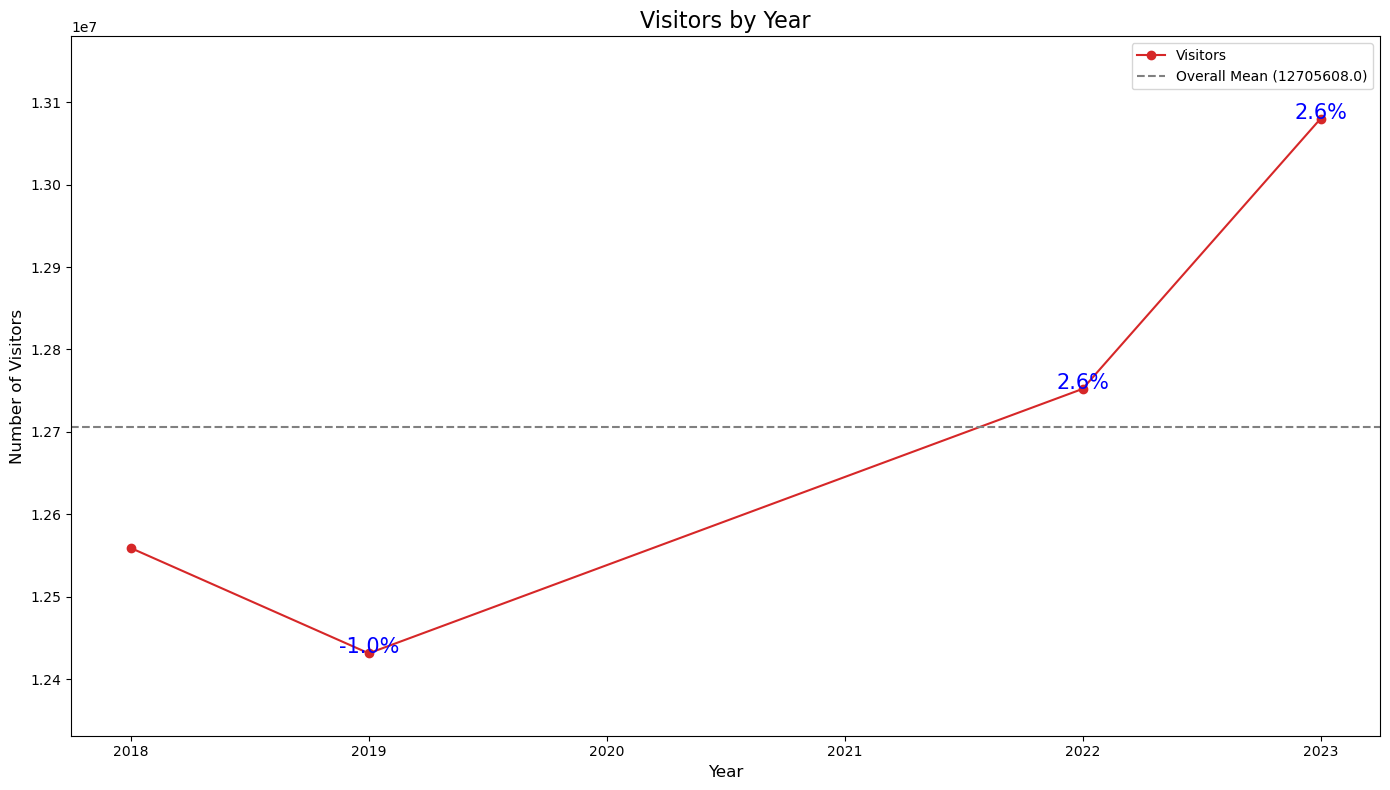

In [31]:
ax_year = ax[['year', 'visitors']]
ax_year = ax_year.groupby('year', as_index=False).sum()


# 직전 시즌 대비 증가/감소율 계산
ax_year['change_pct'] = ax_year['visitors'].pct_change() * 100

# 전체 평균 계산
overall_mean = ax_year['visitors'].mean()

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 8))

# 방문자 수와 변화율 플롯
ax1.plot(ax_year['year'], ax_year['visitors'], color='tab:red', marker='o', label='Visitors')

# 전체 평균점선 추가
ax1.axhline(overall_mean, color='gray', linestyle='--', label=f'Overall Mean ({overall_mean:.1f})')


# 변화율 텍스트 추가
for i in range(1, len(ax_year)):
    ax1.text(
        x=ax_year['year'][i],
        y=ax_year['visitors'][i],
        s=f"{ax_year['change_pct'][i]:.1f}%",
        fontsize=15,
        color="blue",
        ha="center"
    )



# y축 범위 설정
y_min = min(ax_year['visitors'].min(), overall_mean)
y_max = max(ax_year['visitors'].max(), overall_mean)
ax1.set_ylim(y_min - 100000, y_max + 100000)

# 그래프 제목과 레이블 설정
plt.title('Visitors by Year', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Visitors', fontsize=12)

# 범례와 레이아웃 조정
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 맨 아래 셀 실행을 위해선 ax가 유지되어야 함.
ax_copy = ax.copy()

# 전처리가 안된 'year', 'visitors' 그래프 

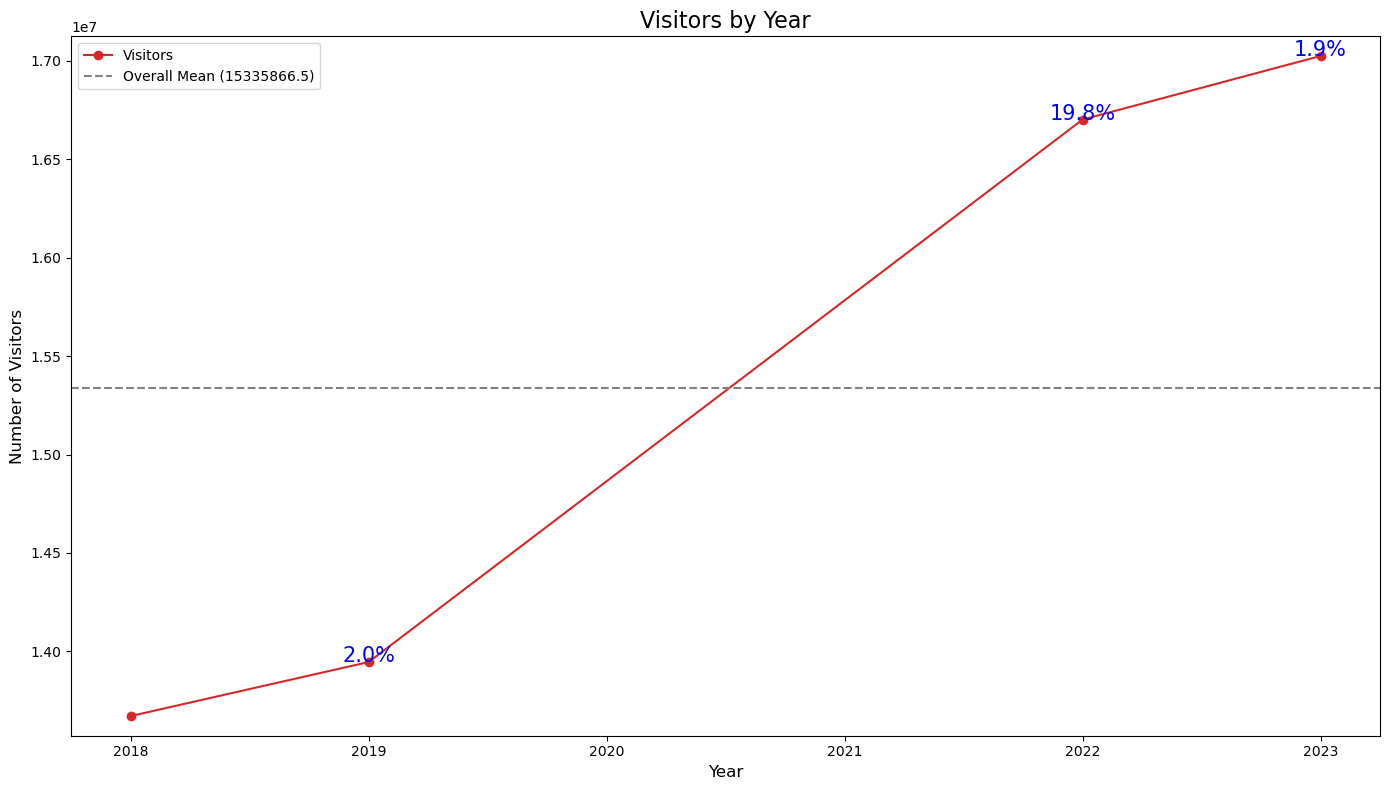

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

ax = df[['개최년도', '시작월', '축제명', '(전체)방문자수', '총비용']].copy()
ax.columns = ['year', 'month', 'name', 'visitors', 'cost']

ax_year = ax[['year', 'visitors']]
ax_year = ax_year.groupby('year', as_index=False).sum()


# 직전 시즌 대비 증가/감소율 계산
ax_year['change_pct'] = ax_year['visitors'].pct_change() * 100

# 전체 평균 계산
overall_mean = ax_year['visitors'].mean()

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 8))

# 방문자 수와 변화율 플롯
ax1.plot(ax_year['year'], ax_year['visitors'], color='tab:red', marker='o', label='Visitors')

# 전체 평균점선 추가
ax1.axhline(overall_mean, color='gray', linestyle='--', label=f'Overall Mean ({overall_mean:.1f})')


# 변화율 텍스트 추가
for i in range(1, len(ax_year)):
    ax1.text(
        x=ax_year['year'][i],
        y=ax_year['visitors'][i],
        s=f"{ax_year['change_pct'][i]:.1f}%",
        fontsize=15,
        color="blue",
        ha="center"
    )



# y축 범위 설정
y_min = min(ax_year['visitors'].min(), overall_mean)
y_max = max(ax_year['visitors'].max(), overall_mean)
ax1.set_ylim(y_min - 100000, y_max + 100000)

# 그래프 제목과 레이블 설정
plt.title('Visitors by Year', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Visitors', fontsize=12)

# 범례와 레이아웃 조정
plt.legend()
plt.tight_layout()
plt.show()


# 두 그래프 비교를 통해 얻을 수 있는 정보

 이상치를 clip 하는 것을 통해 전처리 하였을 때 전체 방문자수의 변화가 유의미 하게 줄어듦.  

 이 말은, 2022년, 2023년에 훅 뛰어오른 인구수의 대부분은 전체적은 축제에서 증가한 것이 아니라 메이저 몇몇 축제에 인구 쏠림 현상이 있다는 것을 의미함.

ValueError: Could not interpret value `year_month` for `x`. An entry with this name does not appear in `data`.

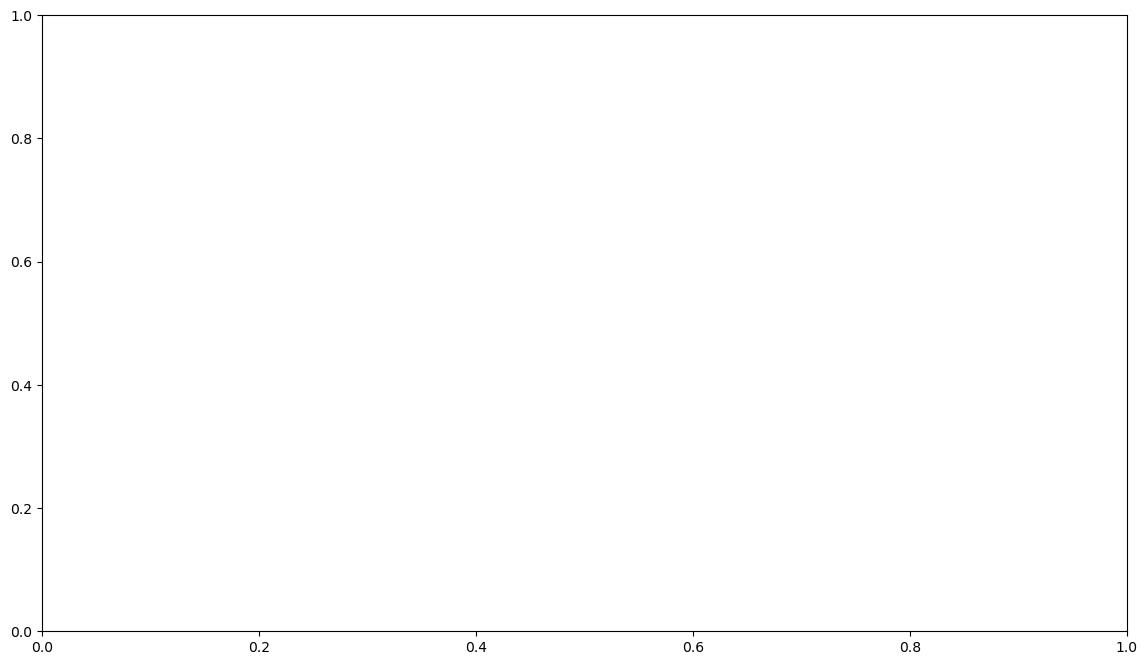

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.scatterplot(
    data=ax_copy,
    x='year_month',
    y='visit/cost_normalized',
    color='blue',
    alpha=0.7,
    label='Visitors per Cost (Scatter)',
       ax=ax1)

ax2 = ax1.twinx()

ax2.plot(
    ax_mean['year_month'],
    ax_mean['visit/cost_normalized'],
    color='orange',
    marker='o',
    label='Average Visitors per Cost')

y_min = min(ax['visit/cost_normalized'].min(), ax_mean['visit/cost_normalized'].min())
y_max = max(ax['visit/cost_normalized'].max(), ax_mean['visit/cost_normalized'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

ax1.set_xticks(range(len(ax_mean['year_month'])))
ax1.set_xticklabels(ax_mean['year_month'], rotation=45, ha='right', fontsize=10)

plt.title('Visitors per Cost', fontsize=16)

plt.tight_layout()
plt.show()
